Sebastian Raschka, 2015  
`mlxtend`, a library of extension and helper modules for Python's data analysis and machine learning libraries

- GitHub repository: https://github.com/rasbt/mlxtend
- Documentation: http://rasbt.github.io/mlxtend/

View this page in [jupyter nbviewer](http://nbviewer.ipython.org/github/rasbt/mlxtend/blob/master/docs/sources/_ipynb_templates/regressor/linear_regression.ipynb)

In [1]:
%load_ext watermark
%watermark -a 'Sebastian Raschka' -u -d -v -p matplotlib,numpy,scipy

Sebastian Raschka 
Last updated: 12/10/2015 

CPython 3.5.0
IPython 4.0.0

matplotlib 1.5.0
numpy 1.10.1
scipy 0.16.0


In [2]:
import sys
sys.path.insert(0, '../../../mlxtend/')

import mlxtend
mlxtend.__version__

'0.3.0dev'

In [3]:
%matplotlib inline

# Adaptive Linear Neuron -- Adaline

A implementation of the ADAptive LInear NEuron, Adaline, for binary classification tasks.

> from mlxtend.classifier import Adaline

# Overview

An illustration of the ADAptive LInear NEuron (Adaline) -- a single-layer artificial linear neuron with a threshold unit:
    
![](./img/adaline_schematic.png)

The Adaline classifier is closely related to the Ordinary Least Squares (OLS) Linear Regression algorithm; in OLS regression we find the line (or hyperplane) that minimizes the vertical offsets. Or in other words, we define the best-fitting line as the line that minimizes the sum of squared errors (SSE) or mean squared error (MSE) between our target variable (y) and our predicted output over all samples $i$ in our dataset of size $n$.

$$ SSE =  \sum_i (\text{target}^{(i)} - \text{output}^{(i)})^2$$

$$MSE = \frac{1}{n} \times SSE$$


[`LinearRegression`](../regressor/LinearRegression.md) implements a linear regression model for performing ordinary least squares regression, and in Adaline, we add a threshold function $g(\cdot)$ to convert the continuous outcome to a categorical class label:

\begin{equation}
 y = g({\mathbf{z}}) =\begin{cases}
    1 & \text{if $\mathbf{z} \ge 0$}\\
    -1 & \text{otherwise}.
  \end{cases}
\end{equation}


An Adaline model can be trained by one of the following three approaches:

- Normal Equations
- Gradient Descent
- Stochastic Gradient Descent

### Normal Equations (closed-form solution)

The closed-form solution should be preferred for "smaller" datasets where calculating (a "costly") matrix inverse is not a concern. For very large datasets, or datasets where the inverse of $[X^T X]$ may not exist (the matrix is non-invertible or singular, e.g., in case of perfect multicollinearity), the gradient descent or stochastic gradient descent approaches are to be preferred.

The linear function (linear regression model) is defined as:

$$z = w_0x_0 + w_1x_1 + ... + w_mx_m = \sum_{i=1}^{n} = \mathbf{w}^T\mathbf{x}$$

where $y$ is the response variable, $\mathbf{x}$ is an $m$-dimensional sample vector, and $\mathbf{w}$ is the weight vector (vector of coefficients). Note that $w_0$ represents the y-axis intercept of the model and therefore $x_0=1$.  

Using the closed-form solution (normal equation), we compute the weights of the model as follows:

$$ \mathbf{w} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^Ty$$

### Gradient Descent (GD)  and Stochastic Gradient Descent (SGD) 

In the current implementation, the Adaline model is learned via Gradient Descent or Stochastic Gradient Descent.

See [Gradient Descent and Stochastic Gradient Descent](../general_concepts/gradient-optimization.html) and [Deriving the Gradient Descent Rule for Linear Regression and Adaline](../general_concepts/linear-gradient-derivative.md) for details.

Random shuffling is implemented as:

- for one or more epochs
    - randomly shuffle samples in the training set
        - for training sample *i*
            - compute gradients and perform weight updates

### References


- B. Widrow, M. E. Hoff, et al. [Adaptive switching circuits](http://www.rob.uni-luebeck.de/index.php?id=267). 1960.

### Related Topics

- [LinearRegression](../regressor/LinearRegression.md)
- [Gradient Descent and Stochastic Gradient Descent](../general_concepts/gradient-optimization.md)
- [Deriving the Gradient Descent Rule for Linear Regression and Adaline](../general_concepts/linear-gradient-derivative.md)

# Examples

## Example 1 - Closed Form Solution

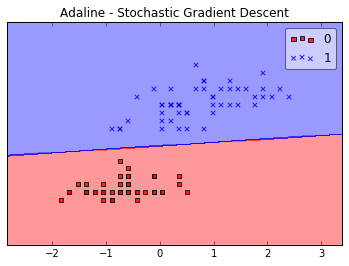

In [9]:
from mlxtend.data import iris_data
from mlxtend.evaluate import plot_decision_regions
from mlxtend.classifier import Adaline
import matplotlib.pyplot as plt

# Loading Data

X, y = iris_data()
X = X[:, [0, 3]] # sepal length and petal width
X = X[0:100] # class 0 and class 1
y = y[0:100] # class 0 and class 1

# standardize
X[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()


ada = Adaline(epochs=30, eta=0.01, solver='normal equation', random_seed=1)
ada.fit(X, y)
plot_decision_regions(X, y, clf=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.show()

## Example 2 - Gradient Descent

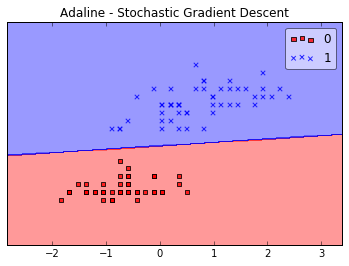

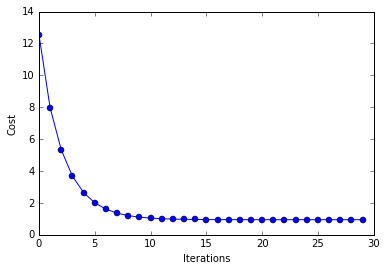

In [5]:
from mlxtend.data import iris_data
from mlxtend.evaluate import plot_decision_regions
from mlxtend.classifier import Adaline
import matplotlib.pyplot as plt

# Loading Data

X, y = iris_data()
X = X[:, [0, 3]] # sepal length and petal width
X = X[0:100] # class 0 and class 1
y = y[0:100] # class 0 and class 1

# standardize
X[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()


ada = Adaline(epochs=30, eta=0.01, solver='gd', random_seed=1)
ada.fit(X, y)
plot_decision_regions(X, y, clf=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.show()

plt.plot(range(len(ada.cost_)), ada.cost_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

## Example 3 - Stochastic Gradient Descent

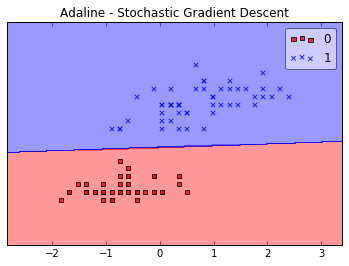

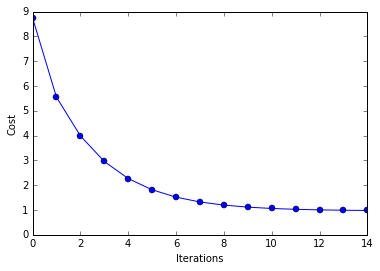

In [6]:
from mlxtend.data import iris_data
from mlxtend.evaluate import plot_decision_regions
from mlxtend.classifier import Adaline
import matplotlib.pyplot as plt

# Loading Data

X, y = iris_data()
X = X[:, [0, 3]] # sepal length and petal width
X = X[0:100] # class 0 and class 1
y = y[0:100] # class 0 and class 1

# standardize
X[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()


ada = Adaline(epochs=15, eta=0.01, solver='sgd', random_seed=1)
ada.fit(X, y)
plot_decision_regions(X, y, clf=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.show()

plt.plot(range(len(ada.cost_)), ada.cost_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

# API

In [8]:
from mlxtend.classifier import Adaline
help(Adaline)

Help on class Adaline in module mlxtend.classifier.adaline:

class Adaline(builtins.object)
 |  ADAptive LInear NEuron classifier.
 |  
 |  Parameters
 |  ------------
 |  eta : float
 |    solver rate (between 0.0 and 1.0)
 |  
 |  epochs : int
 |    Passes over the training dataset.
 |  
 |  solver : {'gd', 'sgd', 'normal equation'} (default: 'normal equation')
 |    Method for solving the cost function. 'gd' for gradient descent,
 |    'sgd' for stochastic gradient descent, or 'normal equation' (default)
 |    to solve the cost function analytically.
 |  
 |  shuffle : bool (default: False)
 |      Shuffles training data every epoch if True to prevent circles.
 |  
 |  random_seed : int (default: None)
 |      Set random state for shuffling and initializing the weights.
 |  
 |  zero_init_weight : bool (default: False)
 |      If True, weights are initialized to zero instead of small random
 |      numbers in the interval [0,1]
 |  
 |  Attributes
 |  -----------
 |  w_ : 1d-array
 